In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
from numpy import *
import subprocess
import scipy.constants as sc
from scipy.integrate import cumtrapz

In [3]:
subprocess.check_output("bash job.sh", shell=True, cwd="./reversible_scaling")

b''

In [4]:
T0 = 100 # Reference temperature [K]
kB = sc.value('Boltzmann constant in eV/K') 

In [5]:
# Load free energy reference value.
T, F0 = loadtxt('./frenkel_ladd/data/free_energy.dat', unpack=True)
F0 = F0[T==T0]

In [6]:
# Load potential energy and lambda.
U_f, lamb_f = loadtxt('./reversible_scaling/data/forward.dat', unpack=True)
U_b, lamb_b = loadtxt('./reversible_scaling/data/backward.dat', unpack=True)

In [7]:
# Fix adapt also scales the potential energy besides the forces, so we unscale.
U_f /= lamb_f
U_b /= lamb_b

In [8]:
# Compute work done using cummulative integrals [Eq.(21) in the paper].
I_f = cumtrapz(U_f,lamb_f,initial=0)
I_b = cumtrapz(U_b[::-1],lamb_b[::-1],initial=0)
W = (I_f+I_b) / (2*lamb_f)

In [9]:
# Compute free energy [Eq.(22) in the paper] and save results.
T = T0 / lamb_f
F = F0/lamb_f + 1.5*kB*T*log(lamb_f) + W
savetxt('./reversible_scaling/data/free_energy.dat', transpose([T,F]),
        header='T [K] F [eV/atom]', fmt='%6.1f %.4f')

In [10]:
c = ['#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999']

In [11]:
################################################################################
# Load data.                                                                   #
################################################################################

T_rs, F_rs = loadtxt('./reversible_scaling/data/free_energy.dat', unpack=True)
T_fl, F_fl = loadtxt('./frenkel_ladd/data/free_energy.dat', unpack=True, usecols=[0,1])

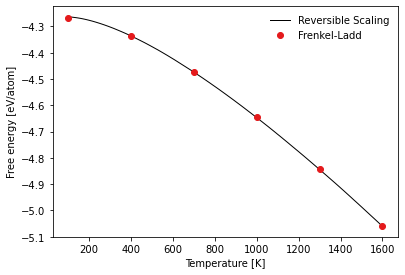

In [12]:
################################################################################
# Plot.                                                                        #
################################################################################

# Start figure.
fig = plt.figure()
ax = fig.add_axes([0.15,0.15,0.80,0.80])

# Plot.
ax.plot(T_rs, F_rs, '-', c='k', lw=1, label='Reversible Scaling')
ax.plot(T_fl, F_fl, 'o', c=c[0], label='Frenkel-Ladd')
 
# Add details and save figure.
ax.set_xlabel(r'Temperature [K]')
ax.set_ylabel(r'Free energy [eV/atom]')
ax.legend(loc='best', frameon=False)
fig.savefig("fig_free_energy_vs_temperature.png", dpi=300)

################################################################################

